In [1]:
import numpy as np
import pandas as pd

In [2]:
# load file
df= pd.read_csv('Combined_DS-Jobs_data.csv')
df.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",14-01-2024,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",14-01-2024,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",14-01-2024,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",12-01-2024,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",14-01-2024,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...


In [3]:
df.shape

(12217, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             12217 non-null  object
 1   last_processed_time  12217 non-null  object
 2   last_status          12217 non-null  object
 3   got_summary          12217 non-null  object
 4   got_ner              12217 non-null  object
 5   is_being_worked      12217 non-null  object
 6   job_title            12217 non-null  object
 7   company              12217 non-null  object
 8   job_location         12216 non-null  object
 9   first_seen           12217 non-null  object
 10  search_city          12217 non-null  object
 11  search_country       12217 non-null  object
 12  search_position      12217 non-null  object
 13  job_level            12217 non-null  object
 14  job_type             12217 non-null  object
 15  job_skills           12212 non-null  object
 16  job_

## **1. Drop unnecessary Columns:**

In [5]:
# drop unnecessary columns

drop_cols = [
    
    'job_link','last_processed_time','last_status',
    'got_summary','got_ner','is_being_worked','job_summary'
    
]

# drop the columns if they exist
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [6]:
df.shape

(12217, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        12217 non-null  object
 1   company          12217 non-null  object
 2   job_location     12216 non-null  object
 3   first_seen       12217 non-null  object
 4   search_city      12217 non-null  object
 5   search_country   12217 non-null  object
 6   search_position  12217 non-null  object
 7   job_level        12217 non-null  object
 8   job_type         12217 non-null  object
 9   job_skills       12212 non-null  object
dtypes: object(10)
memory usage: 954.6+ KB


## **2. Add JOb_ID column to dataframe:**

In [9]:
# add Job_ID as a new column 
df["Job_ID"] = range(1, len(df) + 1)


In [11]:
df

,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,Job_ID
0,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",14-01-2024,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",1
1,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",14-01-2024,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",2
2,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",14-01-2024,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...",3
3,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",12-01-2024,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",4
4,Lead Data Engineer,Dice,"Plano, TX",14-01-2024,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",5
...,...,...,...,...,...,...,...,...,...,...,...
12212,"Data Reporting Manager, FOOTBALL ASSOCIATION",Guardian Jobs,"Wembley, England, United Kingdom",16-01-2024,High Wycombe,United Kingdom,Manager Forms Analysis,Mid senior,Onsite,"Dashboard development, Reporting, Power BI, SQ...",12213
12213,Corporate AML Alert Investigation Specialist,"Glacier Bancorp, Inc.","Kalispell, MT",14-01-2024,Montana,United States,Teller,Mid senior,Onsite,"Investigation, Antimoney laundering, Fraud, Ba...",12214
12214,Senior Data Scientist,Highnote,"San Francisco, CA",16-01-2024,San Rafael,United States,Mathematician,Mid senior,Onsite,"Data Science, Quantitative Modeling, SQL, Data...",12215
12215,Senior Data Engineer,CompSource Mutual Insurance Company,"Oklahoma City, OK",16-01-2024,Arcadia,United States,Protection Engineer,Mid senior,Onsite,"Data Engineering, Data Quality, SQL, Python, T...",12216


In [12]:
# move Job_ID to the first column
df = df[["Job_ID"] + [col for col in df.columns if col != "Job_ID"]]

In [13]:
df

,Job_ID,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,1,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",14-01-2024,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ..."
1,2,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",14-01-2024,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,3,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",14-01-2024,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da..."
3,4,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",12-01-2024,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,5,Lead Data Engineer,Dice,"Plano, TX",14-01-2024,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."
...,...,...,...,...,...,...,...,...,...,...,...
12212,12213,"Data Reporting Manager, FOOTBALL ASSOCIATION",Guardian Jobs,"Wembley, England, United Kingdom",16-01-2024,High Wycombe,United Kingdom,Manager Forms Analysis,Mid senior,Onsite,"Dashboard development, Reporting, Power BI, SQ..."
12213,12214,Corporate AML Alert Investigation Specialist,"Glacier Bancorp, Inc.","Kalispell, MT",14-01-2024,Montana,United States,Teller,Mid senior,Onsite,"Investigation, Antimoney laundering, Fraud, Ba..."
12214,12215,Senior Data Scientist,Highnote,"San Francisco, CA",16-01-2024,San Rafael,United States,Mathematician,Mid senior,Onsite,"Data Science, Quantitative Modeling, SQL, Data..."
12215,12216,Senior Data Engineer,CompSource Mutual Insurance Company,"Oklahoma City, OK",16-01-2024,Arcadia,United States,Protection Engineer,Mid senior,Onsite,"Data Engineering, Data Quality, SQL, Python, T..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_ID           12217 non-null  int64 
 1   job_title        12217 non-null  object
 2   company          12217 non-null  object
 3   job_location     12216 non-null  object
 4   first_seen       12217 non-null  object
 5   search_city      12217 non-null  object
 6   search_country   12217 non-null  object
 7   search_position  12217 non-null  object
 8   job_level        12217 non-null  object
 9   job_type         12217 non-null  object
 10  job_skills       12212 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


## **3. Rename columns name:**

In [15]:
# renaming columns name 

rename_columns = {

    'Job_ID': 'Job_ID',
    'job_title': 'Job_Title',
    'company': 'Company',
    'job_location': 'Job_Location',
    'first_seen': 'Date_posted',
    'search_city': 'City',
    'search_country': 'Country',
    'search_position': 'Position',
    'job_level': 'Job_Level',
    'job_type': 'Job_Mode',
    'job_skills': 'Skills'

}

df = df.rename(columns=rename_columns)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job_ID        12217 non-null  int64 
 1   Job_Title     12217 non-null  object
 2   Company       12217 non-null  object
 3   Job_Location  12216 non-null  object
 4   Date_posted   12217 non-null  object
 5   City          12217 non-null  object
 6   Country       12217 non-null  object
 7   Position      12217 non-null  object
 8   Job_Level     12217 non-null  object
 9   Job_Mode      12217 non-null  object
 10  Skills        12212 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


## **4. Fixing dtypes after renaming:**

In [18]:
# convert Date_posted is to datetime
df["Date_posted"] = pd.to_datetime(df["Date_posted"], errors="coerce")

C:\Users\Shivam Shere\AppData\Local\Temp\ipykernel_19252\947489877.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_posted"] = pd.to_datetime(df["Date_posted"], errors="coerce")


In [21]:
# convert all string columns 

string_cols = ["Job_Title", "Company", "Job_Location", "City", "Country", "Position", "Skills"]
df[string_cols] = df[string_cols].astype("string")

In [23]:
# convert all categorical columns

cat_cols = ["Job_Level", "Job_Mode"]
df[cat_cols] = df[cat_cols].astype("category")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Job_ID        12217 non-null  int64         
 1   Job_Title     12217 non-null  string        
 2   Company       12217 non-null  string        
 3   Job_Location  12216 non-null  string        
 4   Date_posted   12217 non-null  datetime64[ns]
 5   City          12217 non-null  string        
 6   Country       12217 non-null  string        
 7   Position      12217 non-null  string        
 8   Job_Level     12217 non-null  category      
 9   Job_Mode      12217 non-null  category      
 10  Skills        12212 non-null  string        
dtypes: category(2), datetime64[ns](1), int64(1), string(7)
memory usage: 883.2 KB


## **5. Summary Report:**

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# missing values

print('\nMissing values per Column:')
print(df.isnull().sum())


Missing values per Column:
Job_ID          0
Job_Title       0
Company         0
Job_Location    1
Date_posted     0
City            0
Country         0
Position        0
Job_Level       0
Job_Mode        0
Skills          5
dtype: int64


In [29]:
# duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [30]:
# unique counts

print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
Job_ID          12217
Job_Title        6484
Company          3947
Job_Location     2049
Date_posted         6
City              801
Country             4
Position          711
Job_Level           2
Job_Mode            3
Skills          12204
dtype: int64


In [40]:
# quick statistics 

print("\nDescriptive Statistics:")
print(df.describe(include="all").transpose())


Descriptive Statistics:
                   count unique  \
Job_ID           12217.0    NaN   
Job Title          12217   6484   
Company            12217   3947   
Location           12216   2049   
Date_posted        12217    NaN   
City               12217    801   
Country            12217      4   
Position           12217    711   
Job_level          12217      2   
Employment_type    12217      3   
Skills             12212  12204   

                                                               top   freq  \
Job_ID                                                         NaN    NaN   
Job Title                                     Senior Data Engineer    285   
Company                                          Jobs for Humanity    732   
Location                                              New York, NY    280   
Date_posted                                                    NaN    NaN   
City                                                Greater London    189   
Country        

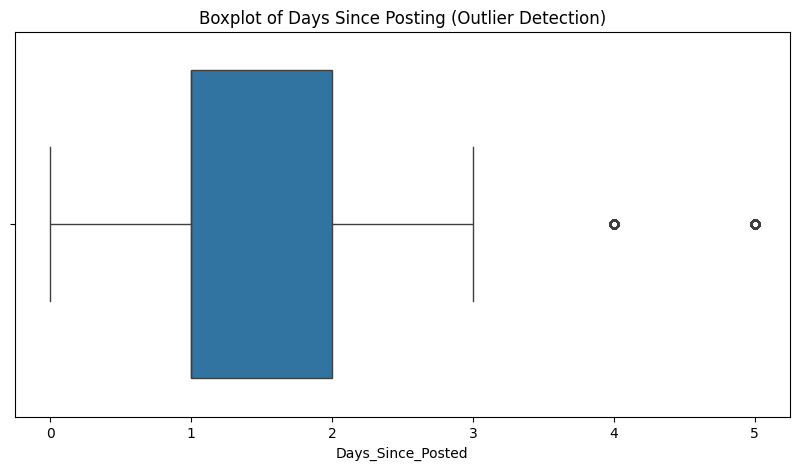

In [32]:
## outliers checking:  only apply to numerical or datetime-derived features but not for categorical/text features

df_box = df.copy()
df_box["Days_Since_Posted"] = (df_box["Date_posted"] - df_box["Date_posted"].min()).dt.days

plt.figure(figsize=(10,5))
sns.boxplot(x=df_box["Days_Since_Posted"])

plt.title("Boxplot of Days Since Posting (Outlier Detection)")
plt.show()

## **6. Data Cleaning:**

In [34]:
# handle missing values

# fill missing Location with "Unknown"
df["Job_Location"] = df["Job_Location"].fillna("Unknown") 
print(df["Job_Location"].isnull().sum())

0


In [35]:
# fill missing Skills with "Not Specified"

df["Skills"] = df["Skills"].fillna("Not Specified")
print(df["Skills"].isnull().sum())

0


In [36]:
# check missing values if it present
df.isnull().sum()

Job_ID          0
Job_Title       0
Company         0
Job_Location    0
Date_posted     0
City            0
Country         0
Position        0
Job_Level       0
Job_Mode        0
Skills          0
dtype: int64

In [38]:
# remove Duplicate Rows

df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [39]:
# handle outliers to remove jobs posted extremely far in the past/future

## IQR method:

Q1 = df_box["Days_Since_Posted"].quantile(0.25)
Q3 = df_box["Days_Since_Posted"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df_box["Days_Since_Posted"] >= lower_bound) & (df_box["Days_Since_Posted"] <= upper_bound)]


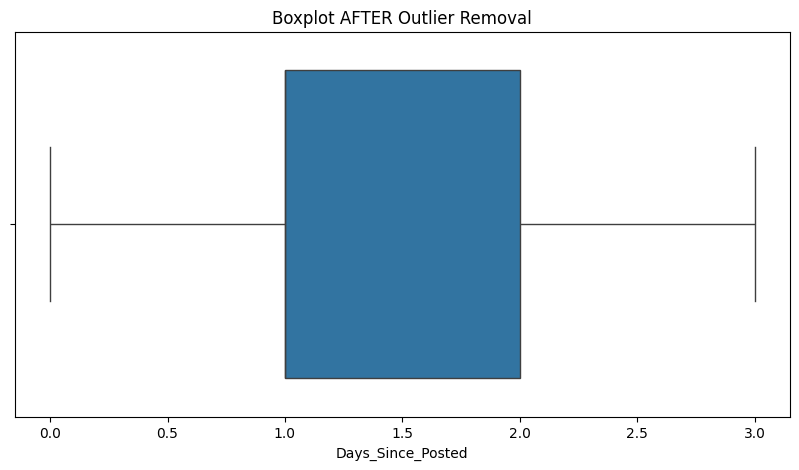

In [40]:
# plot after handling outliers

#after cleaning boxplot
df_clean = df.copy()
df_clean["Days_Since_Posted"] = (df_clean["Date_posted"] - df_clean["Date_posted"].min()).dt.days

plt.figure(figsize=(10,5))
sns.boxplot(x=df_clean["Days_Since_Posted"])
plt.title("Boxplot AFTER Outlier Removal")
plt.show()

## **7. Fix dtypes after cleaning data:**

In [41]:
# convert Date_posted to datetime
df["Date_posted"] = pd.to_datetime(df["Date_posted"], errors="coerce")

In [44]:
# convert all text columns to string 

string_cols = ["Job_Title", "Company", "Job_Location", "City", "Country", "Position", "Skills"]
df[string_cols] = df[string_cols].astype("string")


In [47]:
# convert all categorical columns

cat_cols = ["Job_Level", "Job_Mode"]
df[cat_cols] = df[cat_cols].astype("category")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10733 entries, 0 to 12216
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Job_ID        10733 non-null  int64         
 1   Job_Title     10733 non-null  string        
 2   Company       10733 non-null  string        
 3   Job_Location  10733 non-null  string        
 4   Date_posted   10733 non-null  datetime64[ns]
 5   City          10733 non-null  string        
 6   Country       10733 non-null  string        
 7   Position      10733 non-null  string        
 8   Job_Level     10733 non-null  category      
 9   Job_Mode      10733 non-null  category      
 10  Skills        10733 non-null  string        
dtypes: category(2), datetime64[ns](1), int64(1), string(7)
memory usage: 859.7 KB


In [50]:
df.shape

(10733, 11)

## **8. Save clean data:**

In [51]:
output_path = 'Cleaned_DS_Jobs_data.csv'
df.to_csv(output_path, index=False)

In [53]:
# Reload with correct datatypes

df = pd.read_csv(
    
    'Cleaned_DS_Jobs_data.csv',
    
    dtype={

        'Job_ID': 'int64',
        'Job_Title': 'string',
        'Company': 'string',
        'Job_Location': 'string',
        'City': 'string',
        'Country': 'string',
        'Position': 'string',
        'Job_Level': 'category',
        'Job_Mode': 'category',
        'Skills': 'string'
        
    },
    
    parse_dates=['Date_posted']

)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10733 entries, 0 to 10732
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Job_ID        10733 non-null  int64         
 1   Job_Title     10733 non-null  string        
 2   Company       10733 non-null  string        
 3   Job_Location  10733 non-null  string        
 4   Date_posted   10733 non-null  datetime64[ns]
 5   City          10733 non-null  string        
 6   Country       10733 non-null  string        
 7   Position      10733 non-null  string        
 8   Job_Level     10733 non-null  category      
 9   Job_Mode      10733 non-null  category      
 10  Skills        10733 non-null  string        
dtypes: category(2), datetime64[ns](1), int64(1), string(7)
memory usage: 776.0 KB


In [56]:
df.head(10)

,Job_ID,Job_Title,Company,Job_Location,Date_posted,City,Country,Position,Job_Level,Job_Mode,Skills
0,1,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ..."
1,2,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,3,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da..."
3,4,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,5,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."
5,6,Senior Data Engineer,University of Chicago,"Chicago, IL",2024-01-14,East Chicago,United States,Data Base Administrator,Mid senior,Onsite,"Data Warehouse (DW), Extract/Transform/Load (E..."
6,8,"Principal Associate, Data Loss Prevention (DLP...",Jobs for Humanity,"Scranton, PA",2024-01-14,Nanticoke,United States,Architect,Mid senior,Onsite,"Data Loss Prevention (DLP), Cybersecurity, Web..."
7,9,Senior Financial Data Analyst,The Walt Disney Company,"Lake Buena Vista, FL",2024-01-15,Avondale,United States,Budget Officer,Mid senior,Onsite,"Problem solving, Data analysis, Predictive ana..."
8,10,Machine Learning Infrastructure Engineer,L&T Technology Services,"Sunnyvale, CA",2024-01-14,Redwood City,United States,Test Fixture Designer,Mid senior,Onsite,"Machine Learning, System Design, Multimodal In..."
9,11,Sr. Workforce Management Data Analyst,"Wisemen Multimedia, LLC","Atlanta, GA",2024-01-13,Stockbridge,United States,Management Analyst,Mid senior,Onsite,"SQL, Database Administration, Advanced Statist..."


In [57]:
df.tail(10)

,Job_ID,Job_Title,Company,Job_Location,Date_posted,City,Country,Position,Job_Level,Job_Mode,Skills
10723,12202,Assistant Professor of Data Science,Florida Polytechnic University,"Lakeland, FL",2024-01-14,Lake Wales,United States,Instructor,Mid senior,Onsite,"Data Science, Data Engineering, Big Data Analy..."
10724,12203,"Associate Director, Data & Specimen Governance...",Health eCareers,"Princeton, NJ",2024-01-14,Hillsborough,United States,Manager Records Analysis,Mid senior,Onsite,"Data Governance, Biospecimen Governance, Proje..."
10725,12204,"Lead Data Engineer, (Python, Java or Scala)",Jobs for Humanity,"Charlottesville, VA",2024-01-14,Waynesboro,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Python, Java, Scala, Data Modeling, Machine Le..."
10726,12205,Senior Data Scientist - Statistics,United Airlines,"Chicago, IL",2024-01-14,East Chicago,United States,Microbiologist,Mid senior,Onsite,"Data Analytics, Digital Solutions, Machine Lea..."
10727,12206,Direct Client - Data Center Systems Admin (Har...,The AES Group,New York City Metropolitan Area,2024-01-14,White Plains,United States,Tier,Mid senior,Onsite,"Problem identification and analysis, Solution ..."
10728,12207,Data Management Analyst,Serco,"Washington, DC",2024-01-14,Clinton,United States,Data Entry Clerk,Mid senior,Onsite,"Database Management, MS Access, MS Excel, PDF,..."
10729,12210,Data Architect,General Dynamics Information Technology,"St Louis, MO",2024-01-14,Collinsville,United States,Interior Designer,Mid senior,Onsite,"Data Architecture, Data Engineering, Linux, Wi..."
10730,12212,Senior Data Insights Analyst,CARFAX Canada,"London, Ontario, Canada",2024-01-14,London,Canada,Data Entry Clerk,Mid senior,Onsite,"Data Analysis, Azure, SQL, PowerBI, Artificial..."
10731,12214,Corporate AML Alert Investigation Specialist,"Glacier Bancorp, Inc.","Kalispell, MT",2024-01-14,Montana,United States,Teller,Mid senior,Onsite,"Investigation, Antimoney laundering, Fraud, Ba..."
10732,12217,"Medical Technologist, MLS or MLT",Community Health Systems,"Mooresville, NC",2024-01-14,Salisbury,United States,Biologist,Mid senior,Onsite,"Medical Technology, MLS, Microbiology, Clinica..."


In [58]:
df.shape

(10733, 11)